## Mathematical Principles in Pattern Recognition (2016/2017)
$\newcommand{\bPhi}{\mathbf{\Phi}}$
$\newcommand{\bb}{\mathbf{b}}$
$\newcommand{\bx}{\mathbf{x}}$
$\newcommand{\bw}{\mathbf{w}}$
$\newcommand{\bt}{\mathbf{t}}$
$\newcommand{\by}{\mathbf{y}}$
$\newcommand{\bm}{\mathbf{m}}$
$\newcommand{\bS}{\mathbf{S}}$
$\newcommand{\bI}{\mathbf{I}}$
$\newcommand{\bA}{\mathbf{A}}$
$\newcommand{\bQ}{\mathbf{Q}}$
$\newcommand{\bR}{\mathbf{R}}$
$\newcommand{\bX}{\mathbf{X}}$
$\newcommand{\bsigma}{\boldsymbol{\sigma}}$
$\newcommand{\bmu}{\boldsymbol{\mu}}$
$\newcommand{\bpi}{\boldsymbol{\pi}}$

# Lab 5

In the computer labs we will work with the Python programming language within a Jupyter notebook. Each week a new notebook is made available that contains the exercises that are to be handed-in. 

* You are expected to work in pairs
* Only one of each pair has to submit on blackboard. Make sure that you add the student ID of your partner in the submission comments.
* The main notebook file you submit should read "Lab[number]_[last name 1]_[last name 2].ipynb", for example "Lab2_Bongers_Versteeg.ipynb". 
* Please make sure your code will run without problems!

Feel free ask any questions during the computer lab sessions, or email the TA, Elise (e.e.vanderpol@uva.nl).


**The due date for the labs is Friday, Oct 27 at 23:59**

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In this tutorial we will work on one final project, instead of the step-by-step exercises of previous labs.

## 1. Final project: Overfitting
**[100 points]** Create a project about overfitting in the remainder of this notebook using markdown cells for equations and comments and code cells for code. Make sure to touch upon the following topics:
1. Use the wine data set to show what *overfitting* is in terms of a regression problem. (see: white_data.npy, white_targets.npy, red_data.npy, red_targets.npy)
2. Discuss how low and high *bias* and *variance* come into play here using figure(s), and write down what *model complexity* has to do with it.
3. One way to deal with your overfitted data in a frequentist setting is regularized regression. Use your pick of regularized regression here and apply a cross-validation scheme to determine the regularization parameter $\lambda$. 
4. Finally, shortly explain the Bayesian point-of-view on what you have done and how this would prevent overfitting. How could you use the Bayesian method to select the best model for your data? Contrast between model averaging and model selection and use the latter to select a good model.

For more background information, refer to Bishop 1.1, 1.3, 1.5, 3.1.4, 3.2, 3.4!
 
Notes on implementation:
* Make sure that your hand-in is self-contained, understandable to read from start to end with an introduction about overfitting and overall conclusion or outlook.
* This time we emphasize code cleanness and will allocate **[20 points]** to the readability of your code and graphical output.
* Use your own implementations instead of standard Python machine-learning tools, like `sk-learn`. More standard modules like `numpy` are allowed as always.
* As always: make sure you submit all included data and files necessary to run your notebook out-of-the-box!

In [3]:

# Using pickle to read binary data
import _pickle as cPickle

# Reading red_data and white_data
with open('assets/red_data.npy', 'rb') as f:
    red_data = cPickle.load(f, encoding='latin1')
with open('assets/white_data.npy', 'rb') as f:
    white_data = cPickle.load(f, encoding='latin1')

# Reading red_targets and white_targets
with open('assets/red_targets.npy', 'rb') as f:
    red_targets = cPickle.load(f, encoding='latin1')
with open('assets/white_targets.npy', 'rb') as f:
    white_targets = cPickle.load(f, encoding='latin1')
    
# Previewing data
column_names = [
    'fixed acidity',
    'volatile acidity',
    'citric acid',
    'residual sugar',
    'chlorides',
    'free sulfur dioxide',
    'total sulfur dioxide',
    'density',
    'pH',
    'sulphates',
    'alcohol',
]

# Summary
format = "%2i - %-20s \t %10f %10f"

print("%2s - %-20s \t %10s %10s" % ("nr", "Attribute", "Red","White"))

for i, val in enumerate(column_names):
    print(format % (i, val, red_data[0, i], white_data[0, i]))
    
print(format % (11,"quality [1,10]", red_targets[0], white_targets[0]))


nr - Attribute            	        Red      White
 0 - fixed acidity        	   7.400000   7.000000
 1 - volatile acidity     	   0.700000   0.270000
 2 - citric acid          	   0.000000   0.360000
 3 - residual sugar       	   1.900000  20.700000
 4 - chlorides            	   0.076000   0.045000
 5 - free sulfur dioxide  	  11.000000  45.000000
 6 - total sulfur dioxide 	  34.000000 170.000000
 7 - density              	   0.997800   1.001000
 8 - pH                   	   3.510000   3.000000
 9 - sulphates            	   0.560000   0.450000
10 - alcohol              	   9.400000   8.800000
11 - quality [1,10]       	   5.000000   6.000000


[Full Overview](https://blackboard.uva.nl/bbcswebdav/pid-6668244-dt-content-rid-11404655_1/xid-11404655_1)

* Number of Instances: red wine - 1599; white wine - 4898.
* Number of Attributes: 11 + output attribute - *Note: several of the attributes may be correlated, thus it makes sense to apply some sort of feature selection.*

In [42]:
# Adding targets as final column.
red   = np.c_[red_data, red_targets]
white = np.c_[white_data, white_targets]

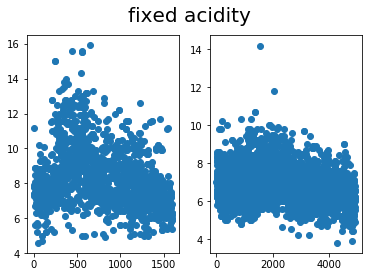

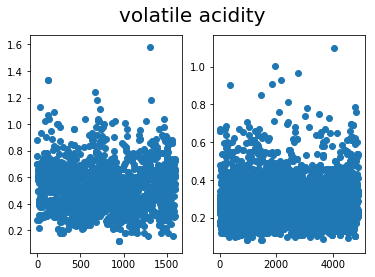

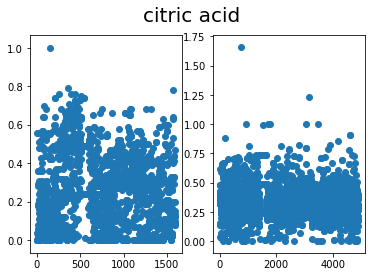

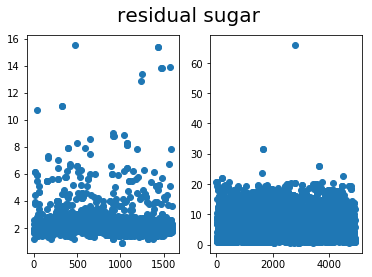

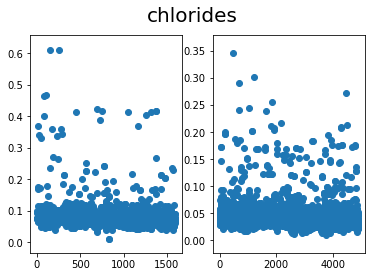

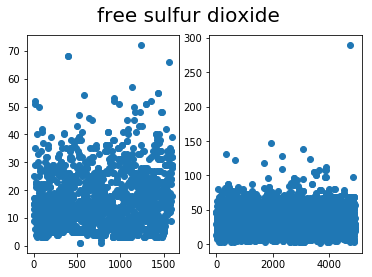

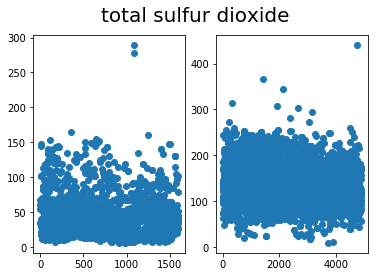

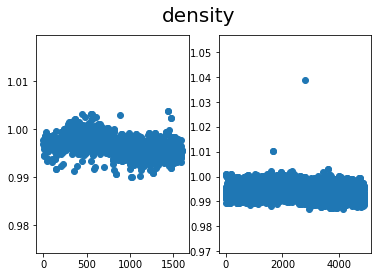

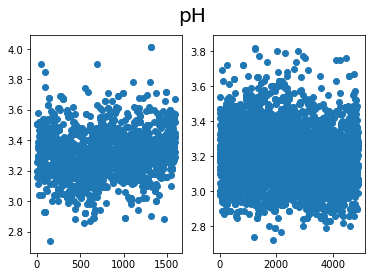

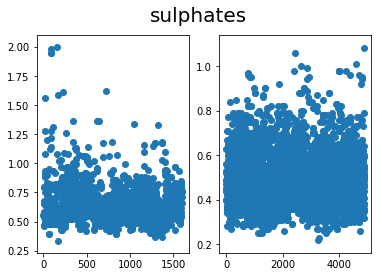

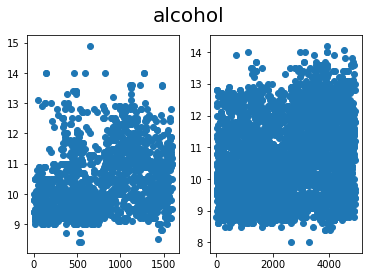

In [46]:
# Analyzing features
red_x = np.arange(0, red_data.shape[0])
white_x = np.arange(0, white_data.shape[0])
for i in range(red_data.shape[1]):
    fig, axs = plt.subplots(1, 2, sharey=False)
    fig.suptitle(column_names[i], fontsize=20)
    axs[0].scatter(red_x, red_data[:, i])
    axs[1].scatter(white_x, white_data[:, i])
    plt.show()

### 1.1 ...

Use the wine data set to show what overfitting is in terms of a regression problem. (see: white_data.npy, white_targets.npy, red_data.npy, red_targets.npy)

In [44]:
# Log likelihood
def loglik(data, mu, sigma):
    N = len(data)
    D = len(data[0])
    ln_pi = np.log(2 * math.pi)
    ln_sigma = np.log(np.linalg.det(sigma))
    first_half = -(N * D * ln_pi) /2 - (N * ln_sigma) /2
    
    sec_half = 0.0
    inv_sigma = np.linalg.inv(sigma)
    for line in data:
        m_t = np.matmul(np.transpose(line - mu), inv_sigma)
        sec_half += float(np.matmul(m_t, (line - mu)))
    sec_half = sec_half /-2
    
    return first_half + sec_half

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

### 1.2 ...

Discuss how low and high bias and variance come into play here using figure(s), and write down what model complexity has to do with it.


### 1.3 ...

One way to deal with your overfitted data in a frequentist setting is regularized regression. Use your pick of regularized regression here and apply a cross-validation scheme to determine the regularization parameter λ


### 1.4 ...

Finally, shortly explain the Bayesian point-of-view on what you have done and how this would prevent overfitting. How could you use the Bayesian method to select the best model for your data? Contrast between model averaging and model selection and use the latter to select a good model.
